# Order Stats sample code
This notebook was written by Yubo Wang. It contains jupyter notebook code for a sample of order stats calculation of four runners from two schools competitions in the research of fairness in the XC Running.
## General Question:
As we already do lots of simulation and work on the historical records to prove that the distribution of historical records is different from what we hypothesized which the probability of being into the top 16 is equal to the percentage of population compare to the total population in the division. In this part, we use the technique of order stats to calculate the probability of each outcomes and to calculate the probability of winning for each school.
## Our Approach:
Order Stats can be use to caclulate the probability of each runner at a specific place in the competition. Thus, we are able to calculate the probability of each runner at different places to calculate the probability of having different outcomes in the competitions also the probability of winning for each school.

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.stats import beta
from itertools import permutations

### Variables
* a: parameter a in beta model  
* b: parameter b in beta model  
* loc: shift of beta model  
* scale: scale of beta model  
* x: several points used to plot the graphs
* n1: population of school 1
* n2: population of school 2

In [2]:
a = np.float(2.5)
b = np.float(4)
loc = np.float(5.7)
scale = np.float(19)
x = np.linspace(5.7, 6.7, 50)
n1 = np.int(1728)
n2 = np.int(433)

The graph below shows the beta model of a single runner. It is the probability distribution of running pace from the previous research.

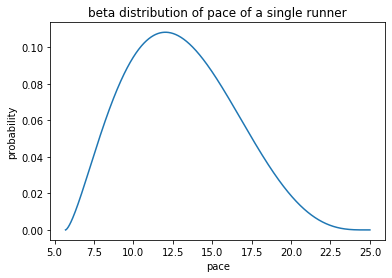

In [3]:
plt.plot(np.linspace(5.7, 25, 1000), beta.pdf(np.linspace(5.7, 25, 1000), a, b, loc, scale))
plt.xlabel("pace")
plt.ylabel("probability")
plt.title("beta distribution of pace of a single runner")
plt.show()

## General concepts
### introduction of order stats
Order stats aims to calculate the probability distribution of a variable with order. Suppose we have independent variables $X_1, X_2, ..., X_n$ such that $X_1 < X_2 < ... < X_n$. Then, we call $X_r$ the $r$th order statistic. In our research, the order statistic is defined by the finishing time of runners, the runner finish the first is our first order statistic and the last one it the last order statistic.
According to the definition, we are able to calculate the probability density function of a given order statistic.
PDF: The probability density function is used to calculate the probability of a variable having a exact value. Thus, we can express the PDF of $r$th order statistic ($X_r$) with population size of $n$ take the value of $x$ can be expressed as the probability of $X_{r-1}$ smaller or equals to x and $X_r$ equals to x and $X_{r+1}$ is grater or equals to x.
$$
f_r(x)=Pr\{X_{r-1}\leq x \cup X_r=x \cup X_{r+1}\geq x\}\\
=Pr\{X_{r-1}\leq x\} Pr\{X_r=x\} Pr\{X_{r+1}\geq x\}\\
=nf(x){{n-1}\choose{r-1}}F(x)^{r-1}(1-F(X))^{n-r}\\
=\frac{n!}{(r-1)!(n-r)!}F(x)^{r-1}f(x)(1-F(X))^{n-r}
$$
In the formula, the term $\frac{n!}{(r-1)!(n-r)!}$ shows the combination of the rest of terms and $F(x)^{r-1}$ calculate the probability of $r-1$ terms are smaller or equal to the current term and $(1-F(X))^{n-r}$ calculate the probability of $n-t$ terms larger than the current term and then $f(x)$ calculate the probability of current term have the value $x$.
### our approach
Suppose we want to calculate one of the combination $MGMG$ (Mason gets first and third place and Granville get the second and the last) from the four runners competition between Mason and Granville (school with highest and lowest girl population in division 1). Then we can express it in the way of order stats which is $M_1 < G_1 < M_2 < G_2$. Then we can simplify again to $M_1 < G_1, M_2, G_2$ and $M_1 < G_1 < (M_2,G_2)$ and $(M_1,G_1,M_2) < G_2$. Thus, we can calculate the PDF of these terms and integrate to get the probability of having this outcome.
$$
P\{MGMG\}=\int_{-\infty}^{\infty}n_MP(M_1=x_1)\int_{x_1}^{\infty}n_GP(G_1=x_2)\int_{x_2}^{\infty}n_{M-1}P(M_2=x_3)\int_{x_3}^{\infty}n_{G-1}P(G_2\geq x_4)dx_4dx_3dx_2dx_1\\
=\int_{-\infty}^{\infty}n_Mpdf_{M_1}(x_1)\int_{x_1}^{\infty}n_Gpdf_{G_1}(x_2)\int_{x_2}^{\infty}n_{M-1}pdf_{M_2}(x_3)(1-cdf_{M_3}(x_3))^{n_M-2}\int_{x_3}^{\infty}n_{G-1}pdf_{G_2}(x_4)(1-cdf_{G_3}(x_4))^{n_G-2}dx_4dx_3dx_2dx_1
$$
Ideally, we should evaluate the integral from negative infinity to positive infinity. However, to save time, we integrate from 5.7 yo 7.7 as it is very unlikely for a runner to have pace outer the range according to out test.

In this part, I calculate the probabiliy of the fastest runner from Mason is faster than the fastest runner from Granville also the fastest runner from Granville is faster than the fastest runner from Mason.

In [4]:
temp1 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * (1 - beta.cdf(x, a, b, loc, scale)) ** (n1-1 + n2)
temp2 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * (1 - beta.cdf(x, a, b, loc, scale)) ** (n2-1 + n1)

In [5]:
# probability of a Mason top runner faster thn Granville top runner
integrate.quad(temp1, 5.7, 6.7)

(0.7996297854441329, 9.011680290882396e-13)

In [6]:
# probability of a Granville top runner faster thn Mason top runner
integrate.quad(temp2, 5.7, 6.7)

(0.2003701950745973, 5.047476475582513e-09)

In [7]:
# plt.plot(x, temp1(x), c='orange', label="Mason top faster than Granvill top")
# plt.plot(x, temp2(x), c='green', label="Granvill top faster than Mason top")
# plt.legend()
# plt.xlabel("pace")
# plt.ylabel("prob")
# plt.title("probability of one top runner faster than the other top runner")
# plt.show()

In this part, I calculate the situation when top two runners from Granville and top one runner from Mason.

In [8]:
# M1 < G1 < G2
temp1 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-1)
temp2 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n1-1) * integrate.quad(temp1, x, 7.7)[0]
integrate.quad(temp2, 5.7, 6.7)

(0.7996297727536597, 5.8521541261099324e-09)

In [9]:
# G1 < M1 < G2
temp3 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-1 + n1-1)
temp4 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp3, x, 7.7)[0]
integrate.quad(temp4, 5.7, 6.7)

(0.1602961560596758, 4.0039717256225863e-10)

In [10]:
# G1 < G2 < M1
temp5 = lambda x: (n2-1) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n1 + n2-2)
temp6 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp5, x, 7.7)[0]
integrate.quad(temp6, 5.7, 6.7)

(0.040074039010390285, 4.668348454922874e-09)

In [11]:
# plt.plot(x, np.array([temp2(i) for i in x]), label="M1 < G1 < G2")
# plt.plot(x, np.array([temp4(i) for i in x]), label="G1 < M1 < G2")
# plt.plot(x, np.array([temp6(i) for i in x]), label="G1 < G2 < M1")
# plt.xlabel("pace")
# plt.ylabel("prob")
# plt.legend()
# plt.title("2 Granville and 1 Mason")
# plt.show()

In this part, I calculate the situation when top one runner from Granville and top two runners from Mason.

In [12]:
# M1 < M2 < G1
temp1 = lambda x: (n1-1) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** n2 * (1-beta.cdf(x, a, b, loc, scale)) ** (n1-2)
temp2 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp1, x, 7.7)[0]
integrate.quad(temp2, 5.7, 6.7)

(0.6393336293650348, 3.2432465741277567e-09)

In [13]:
# M1 < G1 < M2
temp3 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-1 + n1-1)
temp4 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp3, x, 7.7)[0]
integrate.quad(temp4, 5.7, 6.7)

(0.16029615605968195, 8.131590123098857e-10)

In [14]:
# G1 < M1 < M2
temp5 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n1-1)
temp6 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-1) * integrate.quad(temp5, x, 7.7)[0]
integrate.quad(temp6, 5.7, 6.7)

(0.20037019507459553, 4.797445206342797e-10)

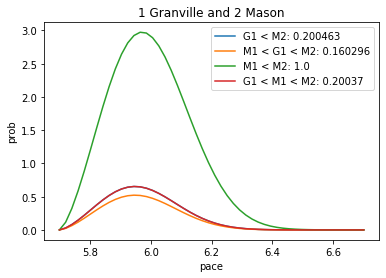

In [15]:
# plt.plot(x, np.array([temp2(i) for i in x]), label="M1 < M2 < G1")
# plt.plot(x, np.array([temp4(i) for i in x]), label="M1 < G1 < M2")
# plt.plot(x, np.array([temp6(i) for i in x]), label="G1 < M1 < M2")
# plt.xlabel("pace")
# plt.ylabel("prob")
# plt.legend()
# plt.title("1 Granville and 2 Mason")
# plt.show()

In this part, I calculate the situation when top two runners from Granville and top two runners from Mason.

In [16]:
# M1 < M2 < G1 < G2
temp1 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-1)
temp2 = lambda x: (n1-1) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n1-2) * integrate.quad(temp1, x, 7.7)[0]
temp3 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp2, x, 6.7)[0]
integrate.quad(temp3, 5.7, 6.7)

(0.6393333947110343, 5.51463829454525e-09)

In [17]:
# M1 < G1 < M2 < G2
temp4 = lambda x: (n1-1) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n1-2 + n2-1)
temp5 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp4, x, 7.7)[0]
temp6 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp5, x, 6.7)[0]
integrate.quad(temp6, 5.7, 6.7)

(0.12822203121651177, 2.8344579647750806e-09)

In [18]:
# M1 < G1 < G2 < M2
temp7 = lambda x: (n2-1) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-2 + n1-1)
temp8 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp7, x, 7.7)[0]
temp9 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp8, x, 6.7)[0]
integrate.quad(temp9, 5.7, 6.7)

(0.03207406918313606, 4.034415793645101e-09)

In [19]:
# G1 < G2 < M1 < M2
temp10 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n1-1)
temp11 = lambda x: (n2-1) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-2) * integrate.quad(temp10, x, 7.7)[0]
temp12 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp11, x, 6.7)[0]
integrate.quad(temp12, 5.7, 6.7)

(0.040074025096287186, 5.063691436103992e-09)

In [20]:
# G1 < M1 < M2 < G2
temp13 = lambda x: (n1-2) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n1-2 + n2-1)
temp14 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp13, x, 7.7)[0]
temp15 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp14, x, 6.7)[0]
integrate.quad(temp15, 5.7, 6.7)

(0.12814778568598584, 2.831747159856626e-09)

In [21]:
# G1 < M1 < G2 < M2
temp16 = lambda x: (n2-1) * beta.pdf(x, a, b, loc, scale) * (1-beta.cdf(x, a, b, loc, scale)) ** (n2-2 + n1-1)
temp17 = lambda x: n1 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp16, x, 7.7)[0]
temp18 = lambda x: n2 * beta.pdf(x, a, b, loc, scale) * integrate.quad(temp17, x, 6.7)[0]
integrate.quad(temp18, 5.7, 6.7)

(0.032074069183135025, 4.034415241914096e-09)